<a href="https://colab.research.google.com/github/yjucho1/tf_codes/blob/master/2%EC%A3%BC%EC%B0%A8_%EC%BD%94%EB%93%9C%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#과대적합과 과소적합

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tf-nightly-2.0-preview
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

     |████████████████████████████████| 95.2MB 51kB/s 
     |████████████████████████████████| 450kB 51.3MB/s 
     |████████████████████████████████| 3.8MB 32.6MB/s 
2.0.0-dev20191002


In [0]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequence(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0 
  return results

train_data = multi_hot_sequence(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequence(test_data, dimension=NUM_WORDS)


17465344/17464789 [==============================] - 0s 0us/step


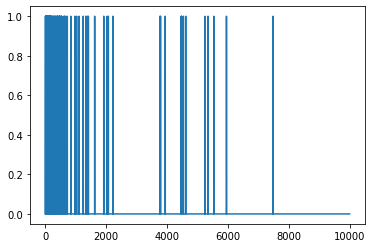

In [0]:
plt.plot(train_data[0])

In [0]:
baseline_model = keras.Sequential([
  keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')                          
])

baseline_model.compile(optimizer='adam', 
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5096 - accuracy: 0.8000 - binary_crossentropy: 0.5096 - val_loss: 0.3501 - val_accuracy: 0.8688 - val_binary_crossentropy: 0.3501
Epoch 2/20
25000/25000 - 3s - loss: 0.2555 - accuracy: 0.9080 - binary_crossentropy: 0.2555 - val_loss: 0.2847 - val_accuracy: 0.8861 - val_binary_crossentropy: 0.2847
Epoch 3/20
25000/25000 - 3s - loss: 0.1842 - accuracy: 0.9348 - binary_crossentropy: 0.1842 - val_loss: 0.2898 - val_accuracy: 0.8846 - val_binary_crossentropy: 0.2898
Epoch 4/20
25000/25000 - 3s - loss: 0.1470 - accuracy: 0.9500 - binary_crossentropy: 0.1470 - val_loss: 0.3134 - val_accuracy: 0.8790 - val_binary_crossentropy: 0.3134
Epoch 5/20
25000/25000 - 3s - loss: 0.1220 - accuracy: 0.9595 - binary_crossentropy: 0.1220 - val_loss: 0.3343 - val_accuracy: 0.8755 - val_binary_crossentropy: 0.3343
Epoch 6/20
25000/25000 - 3s - loss: 0.1006 - accuracy: 0.9684 - binary_crossentropy: 0.1006 - val_loss: 0.3655

In [0]:
smaller_model = keras.Sequential([
  keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(4, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')                          
])

smaller_model.compile(optimizer='adam', 
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [0]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5923 - accuracy: 0.7744 - binary_crossentropy: 0.5923 - val_loss: 0.4945 - val_accuracy: 0.8484 - val_binary_crossentropy: 0.4945
Epoch 2/20
25000/25000 - 3s - loss: 0.3986 - accuracy: 0.8830 - binary_crossentropy: 0.3986 - val_loss: 0.3707 - val_accuracy: 0.8747 - val_binary_crossentropy: 0.3707
Epoch 3/20
25000/25000 - 3s - loss: 0.2937 - accuracy: 0.9076 - binary_crossentropy: 0.2937 - val_loss: 0.3154 - val_accuracy: 0.8830 - val_binary_crossentropy: 0.3154
Epoch 4/20
25000/25000 - 3s - loss: 0.2382 - accuracy: 0.9225 - binary_crossentropy: 0.2382 - val_loss: 0.2932 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2932
Epoch 5/20
25000/25000 - 3s - loss: 0.2032 - accuracy: 0.9329 - binary_crossentropy: 0.2032 - val_loss: 0.2871 - val_accuracy: 0.8864 - val_binary_crossentropy: 0.2871
Epoch 6/20
25000/25000 - 3s - loss: 0.1795 - accuracy: 0.9405 - binary_crossentropy: 0.1795 - val_loss: 0.2885

In [0]:
bigger_model = keras.Sequential([
  keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')                          
])

bigger_model.compile(optimizer='adam', 
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [0]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 19s - loss: 0.3581 - accuracy: 0.8424 - binary_crossentropy: 0.3581 - val_loss: 0.2938 - val_accuracy: 0.8797 - val_binary_crossentropy: 0.2938
Epoch 2/20
25000/25000 - 19s - loss: 0.1478 - accuracy: 0.9450 - binary_crossentropy: 0.1478 - val_loss: 0.3190 - val_accuracy: 0.8740 - val_binary_crossentropy: 0.3190
Epoch 3/20
25000/25000 - 18s - loss: 0.0506 - accuracy: 0.9857 - binary_crossentropy: 0.0506 - val_loss: 0.4527 - val_accuracy: 0.8677 - val_binary_crossentropy: 0.4527
Epoch 4/20
25000/25000 - 18s - loss: 0.0069 - accuracy: 0.9990 - binary_crossentropy: 0.0069 - val_loss: 0.5694 - val_accuracy: 0.8687 - val_binary_crossentropy: 0.5694
Epoch 5/20
25000/25000 - 18s - loss: 0.0014 - accuracy: 1.0000 - binary_crossentropy: 0.0014 - val_loss: 0.6822 - val_accuracy: 0.8705 - val_binary_crossentropy: 0.6822
Epoch 6/20
25000/25000 - 18s - loss: 0.0011 - accuracy: 1.0000 - binary_crossentropy: 0.0011 - val_loss: 

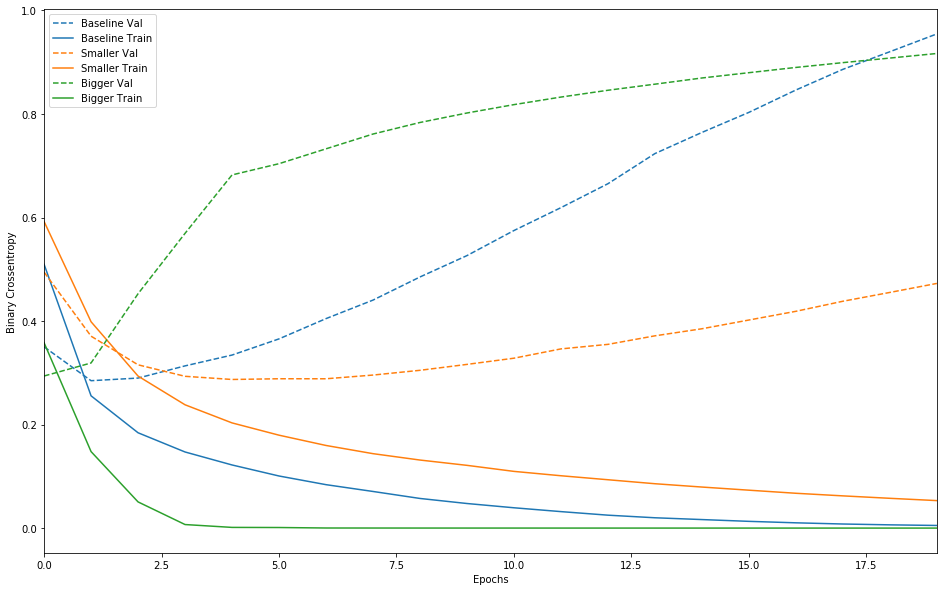

In [0]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16, 10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')
  
  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_', ' ').title())
  plt.legend()

  plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])


In [0]:
l2_model = keras.models.Sequential([
      keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                         activation='relu', input_shape=(NUM_WORDS,)),
      keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                         activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam', 
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])
l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5239 - accuracy: 0.8033 - binary_crossentropy: 0.4838 - val_loss: 0.3795 - val_accuracy: 0.8726 - val_binary_crossentropy: 0.3392
Epoch 2/20
25000/25000 - 3s - loss: 0.2992 - accuracy: 0.9093 - binary_crossentropy: 0.2547 - val_loss: 0.3350 - val_accuracy: 0.8859 - val_binary_crossentropy: 0.2873
Epoch 3/20
25000/25000 - 3s - loss: 0.2465 - accuracy: 0.9311 - binary_crossentropy: 0.1961 - val_loss: 0.3385 - val_accuracy: 0.8848 - val_binary_crossentropy: 0.2862
Epoch 4/20
25000/25000 - 3s - loss: 0.2246 - accuracy: 0.9415 - binary_crossentropy: 0.1705 - val_loss: 0.3564 - val_accuracy: 0.8797 - val_binary_crossentropy: 0.3008
Epoch 5/20
25000/25000 - 3s - loss: 0.2109 - accuracy: 0.9456 - binary_crossentropy: 0.1539 - val_loss: 0.3663 - val_accuracy: 0.8775 - val_binary_crossentropy: 0.3082
Epoch 6/20
25000/25000 - 3s - loss: 0.1990 - accuracy: 0.9532 - binary_crossentropy: 0.1400 - val_loss: 0.3773

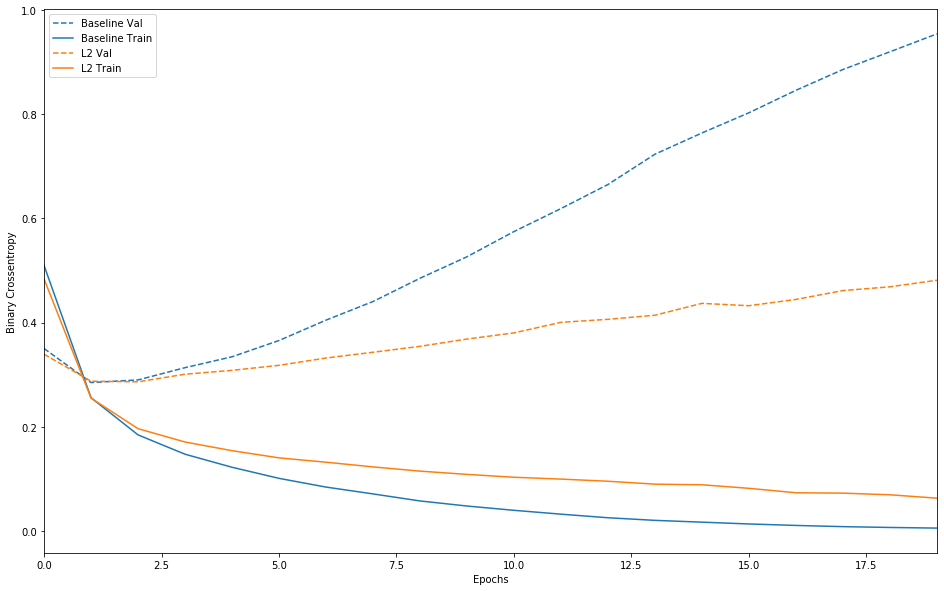

In [0]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [0]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6275 - accuracy: 0.6371 - binary_crossentropy: 0.6275 - val_loss: 0.4981 - val_accuracy: 0.8484 - val_binary_crossentropy: 0.4981
Epoch 2/20
25000/25000 - 3s - loss: 0.4600 - accuracy: 0.8118 - binary_crossentropy: 0.4600 - val_loss: 0.3520 - val_accuracy: 0.8816 - val_binary_crossentropy: 0.3520
Epoch 3/20
25000/25000 - 3s - loss: 0.3609 - accuracy: 0.8712 - binary_crossentropy: 0.3609 - val_loss: 0.2927 - val_accuracy: 0.8873 - val_binary_crossentropy: 0.2927
Epoch 4/20
25000/25000 - 3s - loss: 0.2956 - accuracy: 0.8986 - binary_crossentropy: 0.2956 - val_loss: 0.2833 - val_accuracy: 0.8890 - val_binary_crossentropy: 0.2833
Epoch 5/20
25000/25000 - 3s - loss: 0.2540 - accuracy: 0.9178 - binary_crossentropy: 0.2540 - val_loss: 0.2779 - val_accuracy: 0.8884 - val_binary_crossentropy: 0.2779
Epoch 6/20
25000/25000 - 3s - loss: 0.2152 - accuracy: 0.9293 - binary_crossentropy: 0.2152 - val_loss: 0.2867

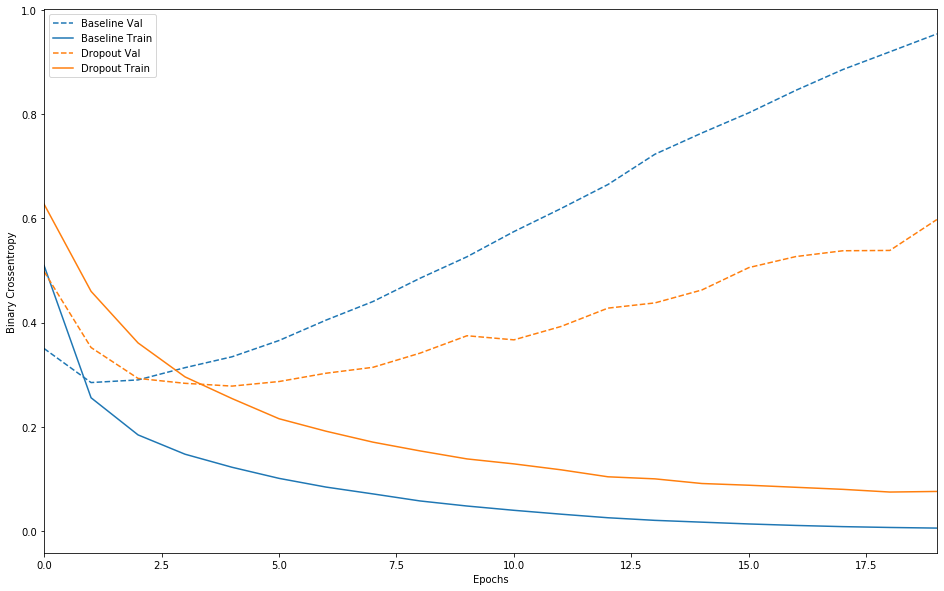

In [0]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])


#load CSV data


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import numpy as np
import tensorflow as tf

In [0]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

16384/13049 [=====================================] - 0s 0us/step


In [0]:
np.set_printoptions(precision=3, suppress=True)

In [0]:
train_file_path

'/root/.keras/datasets/train.csv'

In [0]:
!head {train_file_path}

survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.25,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
1,female,26.0,0,0,7.925,Third,unknown,Southampton,y
1,female,35.0,1,0,53.1,First,C,Southampton,n
0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
0,male,2.0,3,1,21.075,Third,unknown,Southampton,n
1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
1,female,4.0,1,1,16.7,Third,G,Southampton,n


In [0]:
LABEL_COLUMN = 'survived'
LABELS = [0, 1]

In [0]:
def get_dataset(file_path, **kwargs):
  dataset = tf.data.experimental.make_csv_dataset(
      file_path,
      batch_size=5,
      label_name=LABEL_COLUMN,
      na_value="?",
      num_epochs=1,
      ignore_errors=True, 
      **kwargs)
  return dataset

raw_train_data = get_dataset(train_file_path)
raw_test_data = get_dataset(test_file_path)

Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.


In [0]:
def show_batch(dataset):
  for batch, label in dataset.take(1):
    for key, value in batch.items():
      print("{:20s}: {}".format(key, value.numpy()))

In [0]:
show_batch(raw_train_data)

sex                 : [b'male' b'male' b'male' b'male' b'female']
age                 : [28. 26. 34. 35. 22.]
n_siblings_spouses  : [0 0 1 0 1]
parch               : [0 0 0 0 1]
fare                : [29.7   56.496 21.     8.05  29.   ]
class               : [b'First' b'Third' b'Second' b'Third' b'Second']
deck                : [b'C' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Cherbourg' b'Southampton' b'Southampton' b'Southampton' b'Southampton']
alone               : [b'y' b'y' b'n' b'y' b'n']


In [0]:
CSV_COLUMNS = ['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

temp_dataset = get_dataset(train_file_path, column_names=CSV_COLUMNS)

show_batch(temp_dataset)

sex                 : [b'male' b'male' b'male' b'male' b'male']
age                 : [21.  25.  28.  22.  30.5]
n_siblings_spouses  : [0 1 0 1 0]
parch               : [0 0 0 0 0]
fare                : [ 7.775 26.    56.496  7.25   8.05 ]
class               : [b'Third' b'Second' b'Third' b'Third' b'Third']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Southampton'
 b'Southampton']
alone               : [b'y' b'n' b'y' b'n' b'y']


In [0]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'parch', 'fare']
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]
temp_dataset = get_dataset(train_file_path,
                           select_columns=SELECT_COLUMNS,
                           column_defaults = DEFAULTS)

show_batch(temp_dataset)

age                 : [29. 30. 39. 42. 27.]
n_siblings_spouses  : [0. 1. 0. 1. 0.]
parch               : [0. 1. 0. 0. 0.]
fare                : [30.    24.15  13.    27.     7.925]


In [0]:
example_batch, labels_batch = next(iter(temp_dataset))

In [0]:
example_batch

OrderedDict([('age',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([48., 19., 28., 35., 36.], dtype=float32)>),
             ('n_siblings_spouses',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 1., 1.], dtype=float32)>),
             ('parch',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 2.], dtype=float32)>),
             ('fare',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 26.55 ,   7.896,  30.696,  90.   , 120.   ], dtype=float32)>)])

In [0]:
def pack(features, label):
  return tf.stack(list(features.values()), axis=1), label

In [0]:
packed_dataset = temp_dataset.map(pack)

for features, labels in packed_dataset.take(1):
  print(features.numpy())
  print()
  print(labels.numpy())

[[ 17.      0.      2.    110.883]
 [ 33.      1.      1.     20.525]
 [ 51.      0.      0.      8.05 ]
 [ 36.      1.      0.     78.85 ]
 [ 40.      0.      0.    153.462]]

[1 0 0 0 1]


In [0]:
show_batch(raw_train_data)

sex                 : [b'male' b'male' b'male' b'female' b'male']
age                 : [20. 16. 28. 63. 30.]
n_siblings_spouses  : [0 0 3 0 0]
parch               : [0 0 1 0 0]
fare                : [ 7.05   9.5   25.467  9.587  7.229]
class               : [b'Third' b'Third' b'Third' b'Third' b'Third']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Southampton' b'Cherbourg']
alone               : [b'y' b'y' b'n' b'y' b'y']


In [0]:
example_batch, labels_batch = next(iter(temp_dataset)) 

In [0]:
class PackNumericFeatures(object):
  def __init__(self, names):
    self.names = names
  
  def __call__(self, features, labels):
    numeric_features = [features.pop(name) for name in self.names]
    numeric_features = [tf.cast(feat, tf.float32) for feat in numeric_features]
    numeric_features = tf.stack(numeric_features, axis=-1)
    features['numeric'] = numeric_features

    return features, labels
    

In [0]:
NUMERIC_FEATURES = ['age','n_siblings_spouses','parch', 'fare']

packed_train_data = raw_train_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

packed_test_data = raw_test_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

In [0]:
show_batch(packed_train_data)


sex                 : [b'female' b'male' b'female' b'female' b'male']
class               : [b'Third' b'Third' b'Third' b'First' b'First']
deck                : [b'unknown' b'unknown' b'unknown' b'D' b'B']
embark_town         : [b'Southampton' b'Southampton' b'Queenstown' b'Cherbourg' b'Southampton']
alone               : [b'n' b'y' b'y' b'n' b'n']
numeric             : [[ 28.      8.      2.     69.55 ]
 [ 51.      0.      0.      7.054]
 [ 28.      0.      0.      7.733]
 [ 23.      1.      0.    113.275]
 [ 11.      1.      2.    120.   ]]


In [0]:
example_batch, labels_batch = next(iter(packed_train_data)) 


In [0]:
import pandas as pd
desc = pd.read_csv(train_file_path)[NUMERIC_FEATURES].describe()
desc

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [0]:
MEAN = np.array(desc.T['mean'])
STD = np.array(desc.T['std'])

In [0]:
def normalize_numeric_data(data, mean, std):
  # Center the data
  return (data-mean)/std

In [0]:
normalizer = functools.partial(normalize_numeric_data, mean=MEAN, std=STD)

numeric_column = tf.feature_column.numeric_column('numeric', normalizer_fn=normalizer, shape=[len(NUMERIC_FEATURES)])
numeric_columns = [numeric_column]
numeric_column

NumericColumn(key='numeric', shape=(4,), default_value=None, dtype=tf.float32, normalizer_fn=functools.partial(<function normalize_numeric_data at 0x7f9cb8c73e18>, mean=array([29.631,  0.545,  0.38 , 34.385]), std=array([12.512,  1.151,  0.793, 54.598])))

In [0]:
example_batch['numeric']


<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[  4.   ,   4.   ,   2.   ,  31.275],
       [ 32.   ,   0.   ,   0.   ,   8.05 ],
       [ 71.   ,   0.   ,   0.   ,  34.654],
       [ 19.   ,   3.   ,   2.   , 263.   ],
       [ 28.   ,   1.   ,   0.   ,  15.5  ]], dtype=float32)>

In [0]:
numeric_layer = tf.keras.layers.DenseFeatures(numeric_columns)
numeric_layer(example_batch).numpy()

array([[-2.049,  3.001,  2.043, -0.057],
       [ 0.189, -0.474, -0.479, -0.482],
       [ 3.306, -0.474, -0.479,  0.005],
       [-0.85 ,  2.132,  2.043,  4.187],
       [-0.13 ,  0.395, -0.479, -0.346]], dtype=float32)

In [0]:
CATEGORIES = {
    'sex': ['male', 'female'],
    'class' : ['First', 'Second', 'Third'],
    'deck' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'embark_town' : ['Cherbourg', 'Southhampton', 'Queenstown'],
    'alone' : ['y', 'n']
}


In [0]:
categorical_columns = []
for feature, vocab in CATEGORIES.items():
  cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
        key=feature, vocabulary_list=vocab)
  categorical_columns.append(tf.feature_column.indicator_column(cat_col))

In [0]:
categorical_columns


[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('First', 'Second', 'Third'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Cherbourg', 'Southhampton', 'Queenstown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='alone', vocabulary_list=('y', 'n'), dtype=tf.string, default_value=-1, num_oov_buckets=0))]

In [0]:
categorical_layer = tf.keras.layers.DenseFeatures(categorical_columns)
print(categorical_layer(example_batch).numpy()[0])

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [0]:
preprocessing_layer = tf.keras.layers.DenseFeatures(categorical_columns+numeric_columns)

In [0]:
print(preprocessing_layer(example_batch).numpy()[0])


[ 0.     1.     0.     0.     1.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    -2.049  3.001
  2.043 -0.057  1.     0.   ]


In [0]:
model = tf.keras.Sequential([
  preprocessing_layer,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])

In [0]:
train_data = packed_train_data.shuffle(500)
test_data = packed_test_data

In [0]:
model.fit(train_data, epochs=20)


Epoch 1/20
126/126 [==============================] - 1s 10ms/step - loss: 0.5043 - accuracy: 0.7257
Epoch 2/20
126/126 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8102
Epoch 3/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3961 - accuracy: 0.8278
Epoch 4/20
126/126 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8150
Epoch 5/20
126/126 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8405
Epoch 6/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3822 - accuracy: 0.8341
Epoch 7/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3634 - accuracy: 0.8485
Epoch 8/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3574 - accuracy: 0.8437
Epoch 9/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3563 - accuracy: 0.8373
Epoch 10/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3516 - accuracy: 0.850

In [0]:
test_loss, test_accuracy = model.evaluate(test_data)

print('\n\nTest Loss {}, Test Accuracy {}'.format(test_loss, test_accuracy))

     53/Unknown - 0s 8ms/step - loss: 0.4651 - accuracy: 0.8447

Test Loss 0.4651308541168582, Test Accuracy 0.8446969985961914


In [0]:
predictions = model.predict(test_data)

# Show some results
for prediction, survived in zip(predictions[:10], list(test_data)[0][1][:10]):
  print("Predicted survival: {:.2%}".format(prediction[0]),
        " | Actual outcome: ",
        ("SURVIVED" if bool(survived) else "DIED"))


Predicted survival: -28.52%  | Actual outcome:  SURVIVED
Predicted survival: -197.87%  | Actual outcome:  SURVIVED
Predicted survival: 73.98%  | Actual outcome:  SURVIVED
Predicted survival: 175.77%  | Actual outcome:  DIED
Predicted survival: -123.52%  | Actual outcome:  DIED


#TFRecord and tf.Example


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  !pip install -q tf-nightly
except Exception:
  pass
import tensorflow as tf

import numpy as np
import IPython.display as display

     |████████████████████████████████| 511.7MB 19kB/s 
     |████████████████████████████████| 2.8MB 43.9MB/s 
     |████████████████████████████████| 2.9MB 50.6MB/s 
     |████████████████████████████████| 460kB 42.8MB/s 
     |████████████████████████████████| 778kB 48.7MB/s 
ERROR: tensorflow 1.15.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.


In [0]:
def _byte_feature(value):
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy()
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


In [5]:
print(_byte_feature(b'test_string'))
print(_byte_feature(u'test_bytes'.encode('utf-8')))

print(_float_feature(np.exp(1)))

print(_int64_feature(True))
print(_int64_feature(1))

bytes_list {
  value: "test_string"
}

bytes_list {
  value: "test_bytes"
}

float_list {
  value: 2.7182817459106445
}

int64_list {
  value: 1
}

int64_list {
  value: 1
}



In [8]:
feature = _float_feature(np.exp(1))
feature.SerializeToString()

b'\x12\x06\n\x04T\xf8-@'

In [0]:
n_observation = int(1e4)

feature0 = np.random.choice([False, True], n_observation)

feature1 = np.random.randint(0, 5, n_observation)

strings = np.array([b'cat', b'dog', b'chicken', b'horse', b'goat'])
feature2 = strings[feature1]

feature3 = np.random.randn(n_observation)

In [0]:
def serialize_example(feature0, feature1, feature2, feature3):
  feature = {
      'feature0' : _int64_feature(feature0),
      'feature1' : _int64_feature(feature1),
      'feature2' : _byte_feature(feature2),
      'feature3' : _float_feature(feature3),
  }

  example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
  return example_proto.SerializeToString()

In [17]:
example_observation = []
serialized_example = serialize_example(False, 4, b'goat', 0.9876)
serialized_example

b'\nR\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04[\xd3|?\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat'

In [18]:
example_proto = tf.train.Example.FromString(serialized_example)
example_proto

features {
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 0
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 4
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "goat"
      }
    }
  }
  feature {
    key: "feature3"
    value {
      float_list {
        value: 0.9876000285148621
      }
    }
  }
}

In [19]:
tf.data.Dataset.from_tensor_slices(feature1)

<TensorSliceDataset shapes: (), types: tf.int64>

In [20]:
features_dataset = tf.data.Dataset.from_tensor_slices((feature0, feature1, feature2, feature3))
features_dataset

<TensorSliceDataset shapes: ((), (), (), ()), types: (tf.bool, tf.int64, tf.string, tf.float64)>

In [21]:
for f0,f1,f2,f3 in features_dataset.take(1):
  print(f0)
  print(f1)
  print(f2)
  print(f3)

tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(b'dog', shape=(), dtype=string)
tf.Tensor(1.4215122339951562, shape=(), dtype=float64)


In [0]:
def tf_serialize_example(f0,f1,f2,f3):
  tf_string = tf.py_function(
    serialize_example,
    (f0,f1,f2,f3),  # pass these args to the above function.
    tf.string)      # the return type is `tf.string`.
  return tf.reshape(tf_string, ()) # The result is a scalar

In [23]:
tf_serialize_example(f0,f1,f2,f3)

<tf.Tensor: shape=(), dtype=string, numpy=b'\nQ\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\x1d\xf4\xb5?\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x01\n\x13\n\x08feature2\x12\x07\n\x05\n\x03dog'>

In [24]:
serialized_features_dataset = features_dataset.map(tf_serialize_example)
serialized_features_dataset

<MapDataset shapes: (), types: tf.string>

In [0]:
def generator():
  for features in features_dataset:
    yield serialize_example(*features)

In [0]:
serialized_features_dataset = tf.data.Dataset.from_generator(
    generator, output_types=tf.string, output_shapes=())

In [27]:
serialized_features_dataset

<FlatMapDataset shapes: (), types: tf.string>

In [0]:
filename = 'test.tfrecord'
writer = tf.data.experimental.TFRecordWriter(filename)
writer.write(serialized_features_dataset)

In [29]:
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [30]:
for raw_record in raw_dataset.take(10):
  print(repr(raw_record))

<tf.Tensor: shape=(), dtype=string, numpy=b'\nQ\n\x13\n\x08feature2\x12\x07\n\x05\n\x03dog\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\x1d\xf4\xb5?\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x01'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nR\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xf5\xce\x9f?'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nQ\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x01\n\x13\n\x08feature2\x12\x07\n\x05\n\x03dog\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\x0e\x8at?'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nS\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x03\n\x15\n\x08feature2\x12\t\n\x07\n\x05horse\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04|\x00\xbb\xbf\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01'>
<tf.Tensor: shape=(), dtype=string, numpy=

In [0]:
feature_description = {
    'feature0': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature1': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature2': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'feature3': tf.io.FixedLenFeature([], tf.float32, default_value=0.0),
}

def _parse_function(example_proto):
  # Parse the input `tf.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_description)

In [33]:
parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

<MapDataset shapes: {feature0: (), feature1: (), feature2: (), feature3: ()}, types: {feature0: tf.int64, feature1: tf.int64, feature2: tf.string, feature3: tf.float32}>

In [34]:
for parsed_record in parsed_dataset.take(10):
  print(repr(parsed_record))

{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'dog'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=1.4215122>}
{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'goat'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=1.2485033>}
{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'dog'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=0.95523155>}
{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'horse'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=-1.4609523>}
{'feature0': <t

In [0]:
with tf.io.TFRecordWriter(filename) as writer:
  for i in range(n_observation):
    example = serialize_example(feature0[1], feature1[1], feature2[i], feature3[i])
    writer.write(example)

In [36]:
!du -sh {filename}

984K	test.tfrecord


In [37]:
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [38]:
for raw_record in raw_dataset.take(1):
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  print(example)
  

features {
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 1
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 4
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "dog"
      }
    }
  }
  feature {
    key: "feature3"
    value {
      float_list {
        value: 1.421512246131897
      }
    }
  }
}



In [39]:
cat_in_snow  = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')
williamsburg_bridge = tf.keras.utils.get_file('194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg')

16384/15477 [===============================] - 0s 0us/step


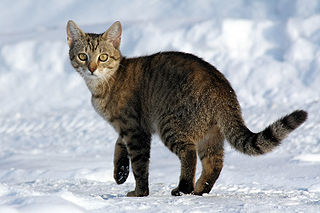

In [40]:
display.display(display.Image(filename=cat_in_snow))
display.display(display.HTML('Image cc-by: <a "href=https://commons.wikimedia.org/wiki/File:Felis_catus-cat_on_snow.jpg">Von.grzanka</a>'))

In [0]:
image_labels = {
    cat_in_snow : 0,
    williamsburg_bridge : 1,
}

In [43]:
# This is an example, just using the cat image.
image_string = open(cat_in_snow, 'rb').read()

label = image_labels[cat_in_snow]

# Create a dictionary with features that may be relevant.
def image_example(image_string, label):
  image_shape = tf.image.decode_jpeg(image_string).shape

  feature = {
      'height': _int64_feature(image_shape[0]),
      'width': _int64_feature(image_shape[1]),
      'depth': _int64_feature(image_shape[2]),
      'label': _int64_feature(label),
      'image_raw': _byte_feature(image_string),
  }

  return tf.train.Example(features=tf.train.Features(feature=feature))

for line in str(image_example(image_string, label)).split('\n')[:15]:
  print(line)
print('...')

features {
  feature {
    key: "depth"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "height"
    value {
      int64_list {
        value: 213
      }
...


In [0]:
# Write the raw image files to `images.tfrecords`.
# First, process the two images into `tf.Example` messages.
# Then, write to a `.tfrecords` file.
record_file = 'images.tfrecords'
with tf.io.TFRecordWriter(record_file) as writer:
  for filename, label in image_labels.items():
    image_string = open(filename, 'rb').read()
    tf_example = image_example(image_string, label)
    writer.write(tf_example.SerializeToString())

In [45]:
!du -sh {record_file}

36K	images.tfrecords


In [46]:
raw_image_dataset = tf.data.TFRecordDataset('images.tfrecords')

# Create a dictionary describing the features.
image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

<MapDataset shapes: {depth: (), height: (), image_raw: (), label: (), width: ()}, types: {depth: tf.int64, height: tf.int64, image_raw: tf.string, label: tf.int64, width: tf.int64}>

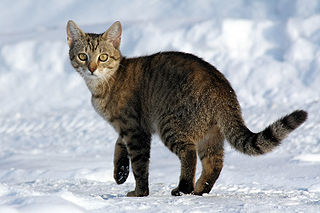

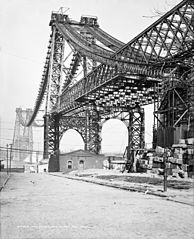

In [47]:
for image_features in parsed_image_dataset:
  image_raw = image_features['image_raw'].numpy()
  display.display(display.Image(data=image_raw))

#모델 저장과 복원


In [0]:
!pip install -q pyyaml h5py

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.0.0-dev20191002


In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Define a simple sequential model
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images,test_labels),
          callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 672/1000 [===================>..........] - ETA: 0s - loss: 1.4462 - accuracy: 0.5610
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 1s 611us/sample - loss: 1.1696 - accuracy: 0.6620 - val_loss: 0.7109 - val_accuracy: 0.7970
Epoch 2/10
 704/1000 [====================>.........] - ETA: 0s - loss: 0.4758 - accuracy: 0.8722
Epoch 00002: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 252us/sample - loss: 0.4200 - accuracy: 0.8910 - val_loss: 0.5518 - val_accuracy: 0.8340
Epoch 3/10
 704/1000 [====================>.........] - ETA: 0s - loss: 0.3093 - accuracy: 0.9162
Epoch 00003: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 255us/sample - loss: 0.2882 - accuracy: 0.9200 - val_loss: 0.4715 - val_accuracy: 0.8440
Epoch 4/10
 704/1000 [====================>.........] - ETA: 0s - loss: 0.2280 - accuracy: 0.9361
Epoch

In [0]:
!ls {checkpoint_dir}


checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


In [0]:
# Create a basic model instance
model = create_model()

# Evaluate the model
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 2.4272 - accuracy: 0.0870
Untrained model, accuracy:  8.70%


In [0]:
# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.3669 - accuracy: 0.8690
Restored model, accuracy: 86.90%


In [0]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=5)

# Create a new model instance
model = create_model()

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model.fit(train_images, 
              train_labels,
              epochs=50, 
              callbacks=[cp_callback],
              validation_data=(test_images,test_labels),
              verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [0]:
!ls {checkpoint_dir}

checkpoint			  cp-0025.ckpt.index
cp-0000.ckpt.data-00000-of-00001  cp-0030.ckpt.data-00000-of-00001
cp-0000.ckpt.index		  cp-0030.ckpt.index
cp-0005.ckpt.data-00000-of-00001  cp-0035.ckpt.data-00000-of-00001
cp-0005.ckpt.index		  cp-0035.ckpt.index
cp-0010.ckpt.data-00000-of-00001  cp-0040.ckpt.data-00000-of-00001
cp-0010.ckpt.index		  cp-0040.ckpt.index
cp-0015.ckpt.data-00000-of-00001  cp-0045.ckpt.data-00000-of-00001
cp-0015.ckpt.index		  cp-0045.ckpt.index
cp-0020.ckpt.data-00000-of-00001  cp-0050.ckpt.data-00000-of-00001
cp-0020.ckpt.index		  cp-0050.ckpt.index
cp-0025.ckpt.data-00000-of-00001


In [0]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2/cp-0050.ckpt'

In [0]:
# Create a new model instance
model = create_model()

# Load the previously saved weights
model.load_weights(latest)

# Re-evaluate the model
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.6146 - accuracy: 0.8750
Restored model, accuracy: 87.50%


In [0]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

# Create a new model instance
model = create_model()

# Restore the weights
model.load_weights('./checkpoints/my_checkpoint')

# Evaluate the model
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1000/1 - 0s - loss: 0.6146 - accuracy: 0.8750
Restored model, accuracy: 87.50%


In [0]:
# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 442us/sample - loss: 1.1514 - accuracy: 0.6640
Epoch 2/5
1000/1000 [==============================] - 0s 176us/sample - loss: 0.4407 - accuracy: 0.8740
Epoch 3/5
1000/1000 [==============================] - 0s 197us/sample - loss: 0.2953 - accuracy: 0.9110
Epoch 4/5
1000/1000 [==============================] - 0s 164us/sample - loss: 0.2070 - accuracy: 0.9560
Epoch 5/5
1000/1000 [==============================] - 0s 160us/sample - loss: 0.1444 - accuracy: 0.9680
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [0]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

my_model
assets	saved_model.pb	variables


In [0]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

print(new_model.predict(test_images).shape)


1000/1 - 0s - loss: 0.3882 - accuracy: 0.8620
Restored model, accuracy: 86.20%
(1000, 10)


In [0]:
# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.h5') 

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 447us/sample - loss: 1.2015 - accuracy: 0.6570
Epoch 2/5
1000/1000 [==============================] - 0s 163us/sample - loss: 0.4334 - accuracy: 0.8830
Epoch 3/5
1000/1000 [==============================] - 0s 164us/sample - loss: 0.2903 - accuracy: 0.9290
Epoch 4/5
1000/1000 [==============================] - 0s 167us/sample - loss: 0.2124 - accuracy: 0.9490
Epoch 5/5
1000/1000 [==============================] - 0s 161us/sample - loss: 0.1641 - accuracy: 0.9630


In [0]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.5432 - accuracy: 0.8640
Restored model, accuracy: 86.40%
